## 신경망 모델 훈련

### 손실 곡선

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
def model_fn(a_layer=None):
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))
    if a_layer: # 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는 것
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [4]:
model=model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

history=model.fit(train_scaled,train_target,epochs=5,verbose=0)#훈련과정 나타내지 않음(verbose=0)

In [7]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


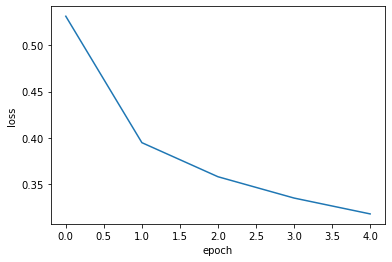

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

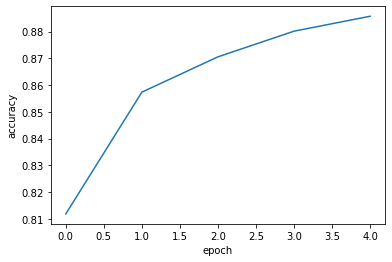

In [9]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
#에포크마다 손실이 감소하고 정확도는 증가함

In [10]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0) #횟수 20으로 늘려서 훈련

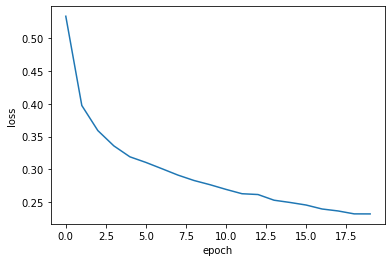

In [11]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 검증 손실

훈련 세트에 대한 점수뿐만 아니라 검증 세트에 대한 점수도 필요함<br>
4장에서는 정확도를 사용하여 과대/과소적합 설명, 이번 장에서는 손실을 사용하여 과대/과소적합 설명

In [12]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


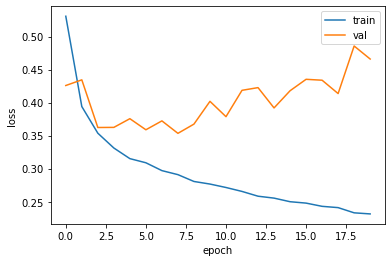

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#3번째 에포크부터 다시 상승하기 시작
#검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실뿐만 아니라 정확도도 증가할 것임

In [15]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

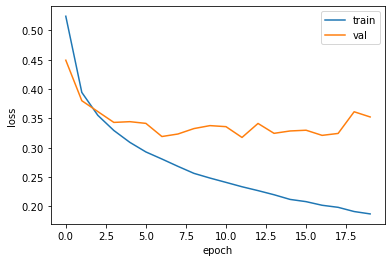

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#과대적합 감소

### 드롭아웃

훈련과정에서 일부 뉴런을 랜덤하게 꺼서(뉴런 출력 0)과대적합을 막음<br>
일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함<br>
![드롭아웃](https://velog.velcdn.com/images%2Fpeterpictor%2Fpost%2F4da6d99d-10a5-4fee-a402-c6ce03c823de%2F%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-07-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%209.29.37.png)<br>
그래서 더 안정적인 예측을 만들 수 있음<br>
또 다른 이유는 마치 3개의 신경망을 앙상블(과대적합 막아줌)하는 것처럼 보임<br>

In [17]:
model=model_fn(keras.layers.Dropout(0.3)) #30%정도 드롭아웃 함

model.summary() #전체 출력 배열의 크기는 바꾸지 않다는 것을 알 수 있음
#자동으로 평가와 예측에 모델을 사용할 때는 드롭아웃이 적용되지 않음

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

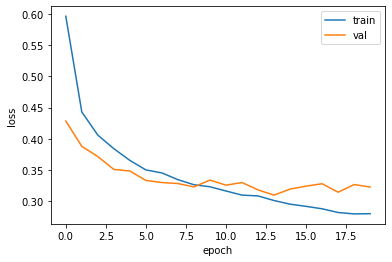

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show() #과대적합이 감소됨

### 모델 저장과 복원

In [20]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [21]:
model.save_weights('model-weights.h5') #훈련된 모델의 파라미터를 저장하는 메서드

In [22]:
model.save('model-whole.h5')#모델 구조와 모델 파라미터 함께 저장

In [24]:
%ls -al *.h5
#첫 번째: 새로운 모델을 만들어 model-weights.h5파일에서 훈련된 모델 파라미터를 읽어서 사용
#두 번째: 아예 model-whole.h5파일에서 새로운 모델을 만들어 바로 사용

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 6492-90A4

 D:\mhgit\mldl_work\ex0802 디렉터리


 D:\mhgit\mldl_work\ex0802 디렉터리

2022-08-02  오후 04:18           333,448 model-weights.h5
2022-08-02  오후 04:18           982,664 model-whole.h5
               2개 파일           1,316,112 바이트
               0개 디렉터리  1,973,542,617,088 바이트 남음


In [25]:
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [26]:
import numpy as np

val_labels=np.argmax(model.predict(val_scaled),axis=-1)
print(np.mean(val_labels==val_target))

375/375 [==============================] - 1s 619us/step
0.8825


In [27]:
model=keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 718us/step - loss: 0.3332 - accuracy: 0.8825


[0.3332017660140991, 0.8824999928474426]

In [41]:
import cv2

t1=cv2.imread('t1.png',cv2.IMREAD_GRAYSCALE)
t1=1-t1
pred=model.predict(t1.reshape(-1,28,28))
print(pred)
print(np.argmax(pred))

1/1 [==============================] - 0s 32ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
8


In [32]:
model=keras.models.load_model('model-whole.h5')
pred=model.predict(t1.reshape(-1,28,28))
print(pred)
print(np.argmax(pred))

1/1 [==============================] - 0s 30ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
8


### 콜백

In [33]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

#에포크마다 모델 저장, 가장 낮은 검증 점수를 만드는 모델 저장
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [35]:
model=keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 721us/step - loss: 0.3194 - accuracy: 0.8870


[0.3194282352924347, 0.8870000243186951]

In [36]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
#과대적합 시작되기 전에 훈련을 미리 중지
#patience=2: 2번 연속 검증점수가 향상되지 않으면 훈련 중지
#restore_best_weights=True: 가장 낮은 검증 손실을 낸 모델 파라미터 저장
# =>가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지
#   훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌림
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True) 
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb,early_stopping_cb])

In [37]:
print(early_stopping_cb.stopped_epoch) #15번째 에포크에서 훈련이 중지됨(patience 때문에 13번째 추정)

14


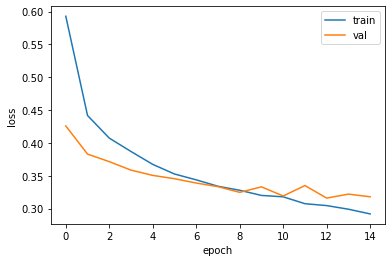

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [39]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 757us/step - loss: 0.3159 - accuracy: 0.8860


[0.31592684984207153, 0.8859999775886536]

In [42]:
model=keras.models.load_model('best-model.h5')
pred=model.predict(t1.reshape(-1,28,28))
print(pred)
print(np.argmax(pred))

1/1 [==============================] - 0s 31ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
8
